# Improving Bank Marketing Strategies: Predictive Modeling of Term Deposit Subscriptions

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#dpp">Data Preprocessing and Feature Engineering</a></li>
<li><a href="#modelling">Modelling</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#limitations">Limitations</a></li>
<li><a href="#references">References</a></li>
</ul>

<a id='intro'></a>
## Introduction

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be (or not) subscribed.
A number of characteristics about the bank client are included in each row, likewise other campaign information.
   
The dependent variable - (variable y)- says 'No' if the client will not subscribe a term deposit, and 'Yes' if they will subscribe.
Therefore, the classification goal is to predict if the client will subscribe a term deposit or not.

The datasets named `bank-full.csv` with all examples ordered by date (from May 2008 to November 2010), offers a rich mix of categorical and numerical features, providing ample opportunity for predictive modeling.

**Source**: [Kaggle](https://www.kaggle.com/datasets/abdelazizsami/bank-marketing)

**Citation**:<br> 
[Moro et al., 2011] S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology.
In P. Novais et al. (Eds.), Proceedings of the European Simulation and Modelling Conference - ESM'2011, pp. 117-121, Guimarães, Portugal, October,  2011. EUROSIS.

**Title**: Bank Marketing

**Created by**: Paulo Cortez (Univ. Minho) and Sérgio Moro (ISCTE-IUL) @ 2012

**Past Usage**: The full dataset was described and analyzed in:\
  S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology. 
  In P. Novais et al. (Eds.), Proceedings of the European Simulation and Modelling Conference - ESM'2011, pp. 117-121, Guimarães, 
  Portugal, October, 2011. EUROSIS.

**Relevant Information**:
   - The classification goal is to predict if the client will subscribe a term deposit (variable y).

**Number of Instances**: 45211 for bank-full.csv (4521 for bank.csv)

**Number of Attributes**: 16 + output attribute.

**Attribute information**:

__Input variables__:
   
__bank client data__:
   
   1. **age** (numeric)
   2. **job**: type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services") 
   3. **marital**: marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
   4. **education**: (categorical: "unknown","secondary","primary","tertiary")
   5. **default**: has credit in default? (binary: "yes","no")
   6. **balance**: average yearly balance, in euros (numeric) 
   7. **housing**: has housing loan? (binary: "yes","no")
   8. **loan**: has personal loan? (binary: "yes","no")
  
__related with the last contact of the current campaign__:

   9. **contact**: contact communication type (categorical: "unknown","telephone","cellular") 
  10. **day**: last contact day of the month (numeric)
  11. **month**: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
  12. **duration**: last contact duration, in seconds (numeric)
      
__other attributes__:

  13. **campaign**: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  14. **pdays**: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
  15. **previous**: number of contacts performed before this campaign and for this client (numeric)
  16. **poutcome**: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

__Output variable (desired target)__:
  
  17. **y** has the client subscribed a term deposit? (binary: "yes","no")

**Missing Attribute Values**: None

#### Research Questions
The main interest of this project are figuring out:

* How can predictive modeling techniques improve the success of bank marketing campaigns in predicting term deposit subscriptions?
* What factors most significantly influence a client's likelihood to subscribe to a term deposit, and how can these insights be used to optimize marketing strategies?
* Which machine learning algorithm provides the most accurate predictions for client subscription to term deposits in a bank marketing campaign?
* How can direct marketing strategies be enhanced using data mining to increase the rate of term deposit subscriptions?


In [3]:
# import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
%matplotlib inline

#ignore warnings
import warnings
warnings.filterwarnings("ignore")

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [5]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('bank-full/bank-full.csv', delimiter=";")

# Display the first few rows of the dataset to understand their structure
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [6]:
def df_report(df):
    """This gives quick report about the missing values, unique numbers and datatypes.
    The argument is the DataFrame
    """
    n_missing = (df.isnull().sum()/df.isnull().count() * 100).sort_values(ascending=False)
    n_unique = df.nunique()
    D_types = df.dtypes
    report = pd.concat([n_missing,n_unique,D_types],axis=1 ,keys= ["%_missing", "no_unique", "data_types"])
    return display(report)

In [7]:
# get the shape of the dataset
data_dim = df.shape
print( "There are %d records in the dataset with %d features." %(data_dim[0],data_dim[1]))

There are 45211 records in the dataset with 17 features.


In [8]:
# generate the data quality report
df_report(df)

,%_missing,no_unique,data_types
age,0.0,77,int64
day,0.0,31,int64
poutcome,0.0,4,object
previous,0.0,41,int64
pdays,0.0,559,int64
campaign,0.0,48,int64
duration,0.0,1573,int64
month,0.0,12,object
contact,0.0,3,object
job,0.0,12,object


As said in the data description, there seems to be no missing values and all variables are in their correct data types.

In [10]:
# generate basic statistics
df.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


This dataset summary provides key insights into the distribution and characteristics of the variables. Here's a general overview:

1. **Count**: There are 45,211 entries across all variables, reflecting the number of clients and instances of direct marketing interactions.

2. **Categorical Variables**:

   - **Job**: The most common occupation is "blue-collar," with 9,732 occurrences.
   - **Marital Status**: Most clients are married (27,214).
   - **Education**: "Secondary" education is the most frequent category, with 23,202 clients.
   - **Default**: The vast majority of clients do not have a credit default (44,396 "no").
   - **Housing and Loan**: Over half of the clients have a housing loan (25,130), and most do not have a personal loan (37,967).
   - **Contact Type**: "Cellular" is the most common form of communication (29,285 occurrences).
   - **Month**: The peak of marketing activity seems to occur in May, with 13,766 calls made in that month.
   - **Poutcome (Outcome of Previous Campaign)**: Most records show "unknown" (36,959 cases), indicating no prior outcome data for many clients.


3. **Numerical Variables**:

   - **Age**: The minimum value is 18, and the maximum is 95, with a mean of 40.9 and a standard deviation of 10.6. The age range is quite broad, but values above 75 or 80 could be considered outliers since they deviate significantly from the mean, though these values are plausible in the context of banking.

   - **Balance**: The minimum balance is -8,019 euros, and the maximum is 102,127 euros. With a mean of 1,362 euros and a standard deviation of 3,044, the presence of negative balances and very high positive balances suggests significant outliers. The interquartile range (IQR) is from 72 euros (25th percentile) to 1,428 euros (75th percentile), meaning that balances significantly outside this range—especially very large negative or positive balances—are likely outliers.
     
   - **Duration**: The duration of the last contact has a minimum of 0 seconds and a maximum of 4,918 seconds, with a mean of 258 seconds and a standard deviation of 257. The IQR is between 103 and 319 seconds. Any durations much longer than this, particularly those near the maximum, could be considered outliers. The 0 durations might also be outliers, depending on the context (e.g., could indicate failed or extremely brief calls).
     
   - **Campaign**: The number of contacts ranges from 1 to 63, with a mean of 2.76 and a standard deviation of 3.09. The IQR is from 1 to 3, so any values much higher than 3 (particularly those approaching the maximum of 63) could be considered outliers. Clients contacted many times in a single campaign may be unusual.
   - **Pdays**: The minimum value is -1 (indicating no prior contact), and the maximum is 871 days. The mean is 40.2 days, and the standard deviation is 100.1. The 25th, 50th, and 75th percentiles are all -1, meaning that most clients were not previously contacted. High values of pdays, especially those nearing the maximum, could be outliers if they represent clients contacted long after a previous campaign.
   - **Previous**: The number of previous contacts ranges from 0 to 275, with a mean of 0.58 and a standard deviation of 2.3. The IQR is from 0 to 0, meaning the vast majority of clients had no prior contacts. High values, particularly those significantly above 0, might be considered outliers. This column will be dropped later on.

4. **Target Variable (y)**: There are two outcomes: the majority did not subscribe to a term deposit ("no," 39,922 cases), while a smaller proportion did ("yes").

In [12]:
# check for duplicates
df.duplicated().sum()

0

The data requires little to no cleaning. So, we can move on to performing EDA:

<a id='eda'></a>
## Exploratory Data Analysis

> ## Univariate Exploration

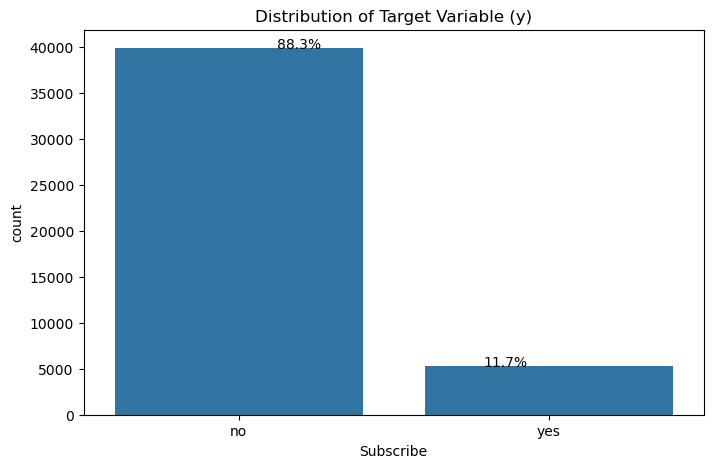

In [15]:
# plot distribution of the dependent variable
plt.figure(figsize=[8, 5])
base_color = sns.color_palette()[0]
total = float(len(df))
ax = sns.countplot(data = df, x = 'y', color = base_color)
plt.title('Distribution of Target Variable (y)')
plt.xlabel('Subscribe')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = (p.get_x() + p.get_width())/1.5
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
plt.show()

It could be seen from the distribution above that the dataset is imbalance as there are more than thrice the record of client that subscribed a term deposit than those that did not subscribe. This is going to be of concern for our machine learning model. Next we would try to see the distribution of all independent variables:

In [17]:
# get numeric columns and categotical columns separately
numeric_vars = [var for var in df.columns if df[var].dtype != 'object']
categoric_vars = [var for var in df.columns if df[var].dtype == 'object']

numeric_vars, categoric_vars

(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'],
 ['job',
  'marital',
  'education',
  'default',
  'housing',
  'loan',
  'contact',
  'month',
  'poutcome',
  'y'])

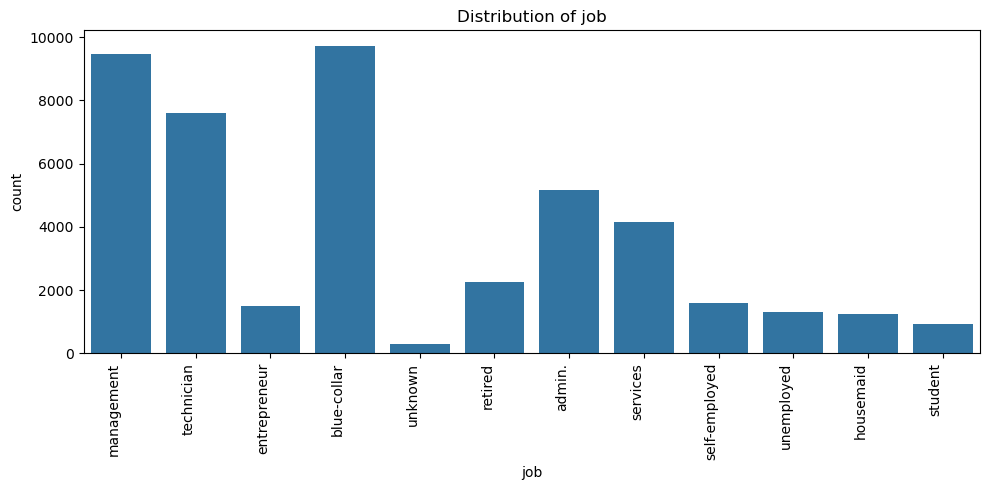

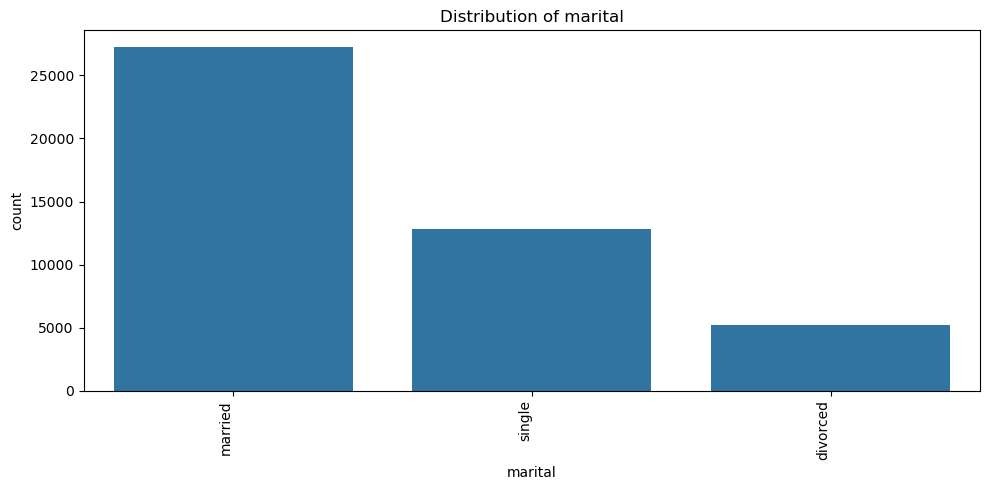

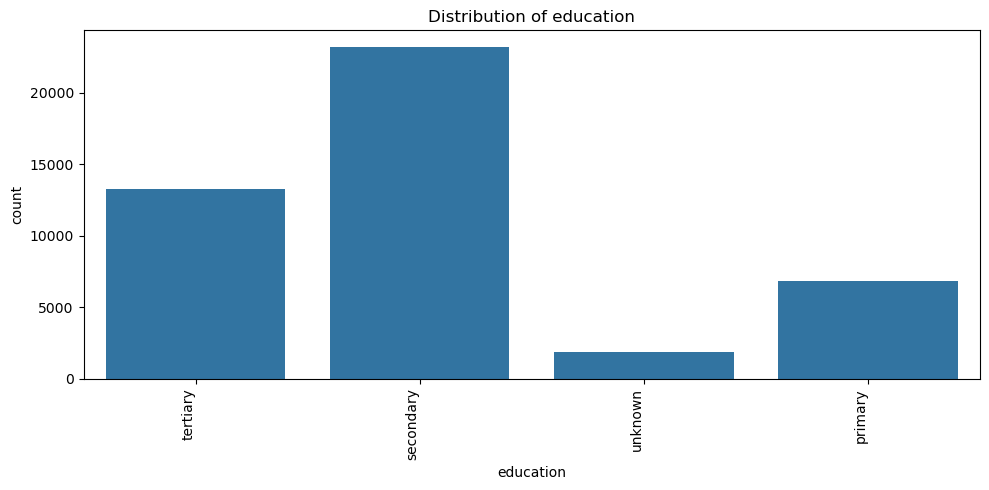

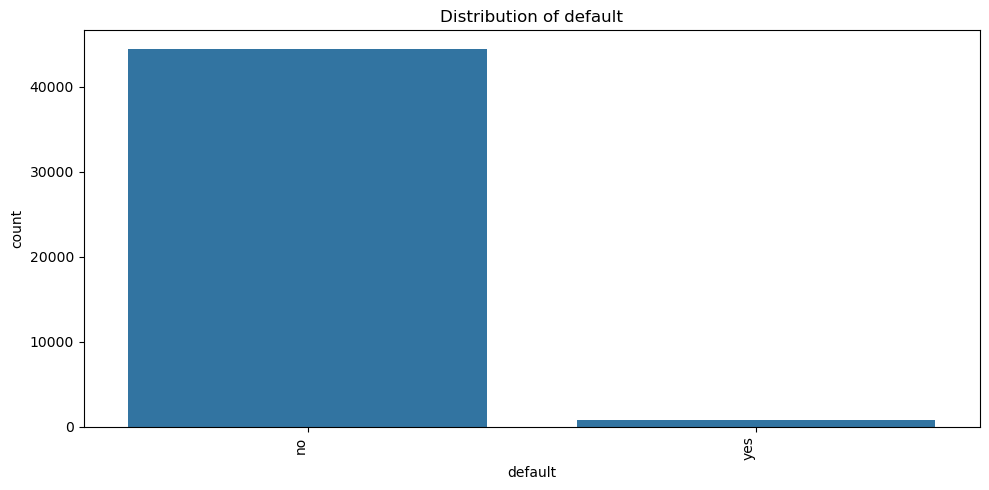

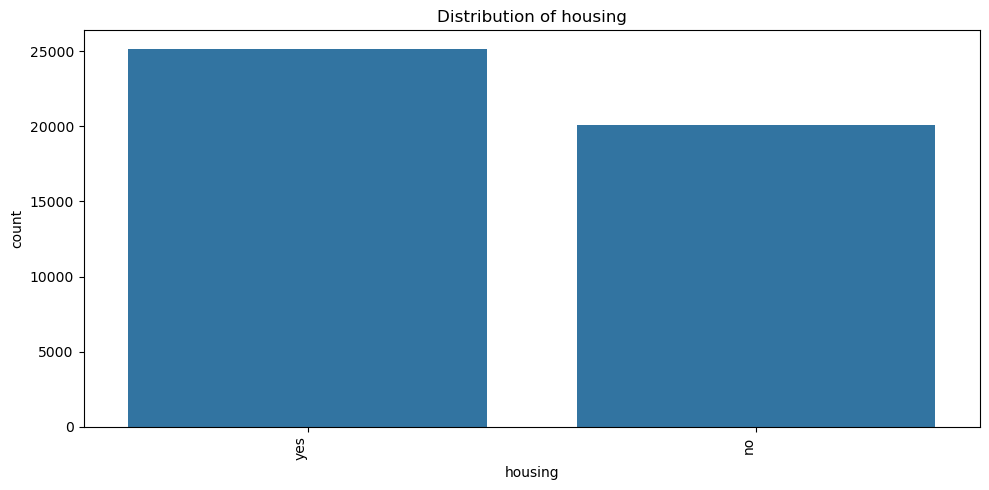

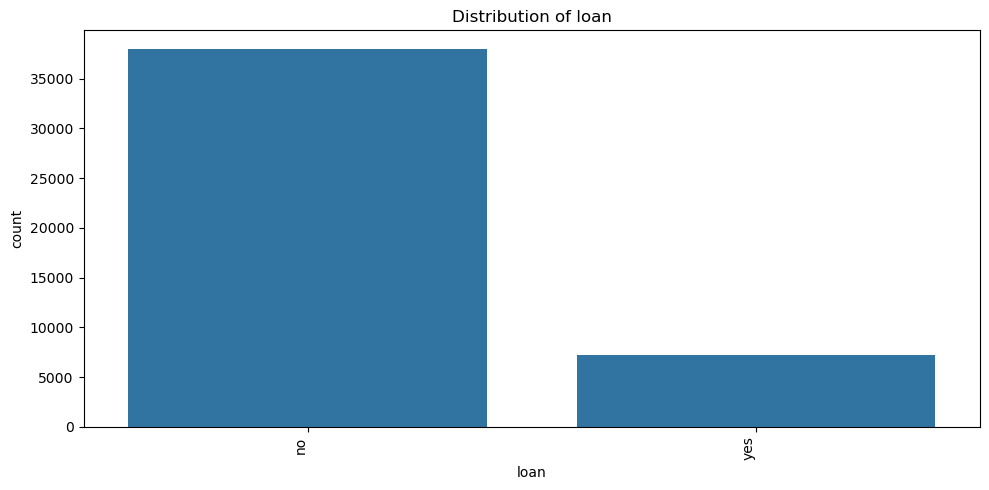

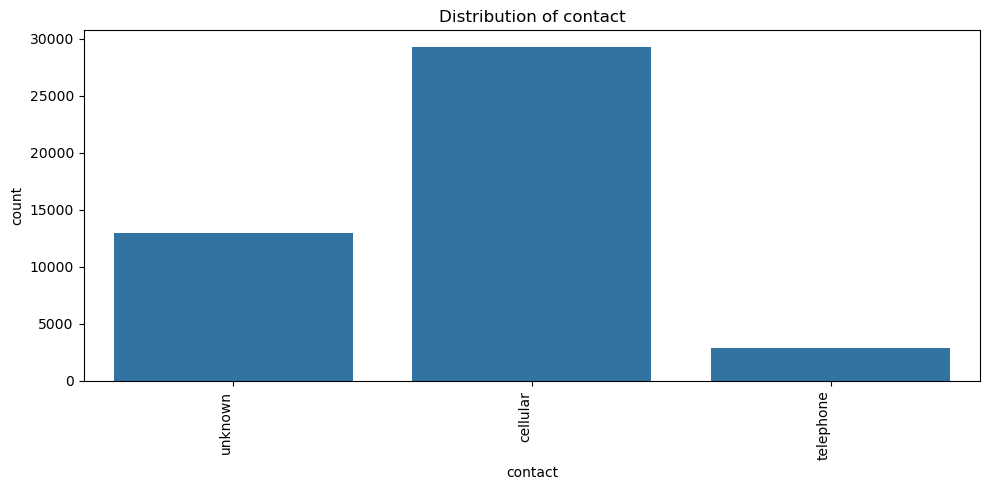

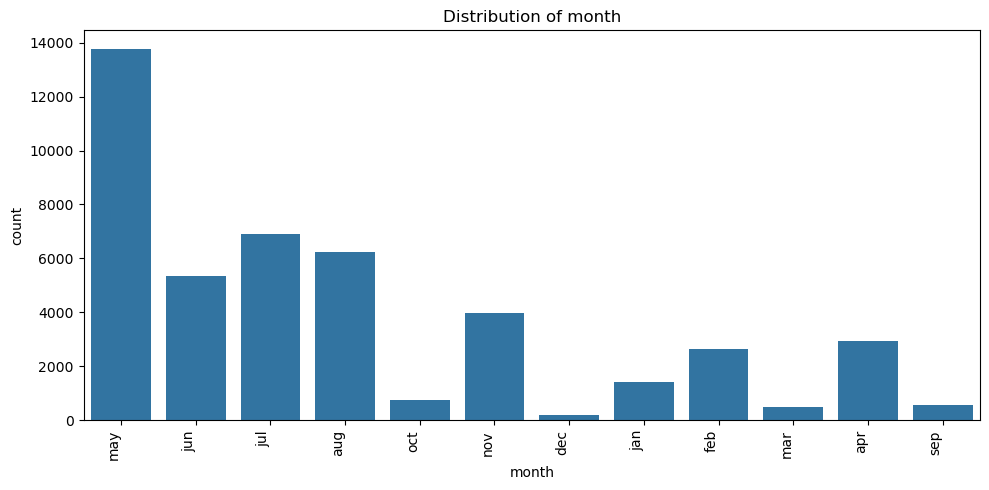

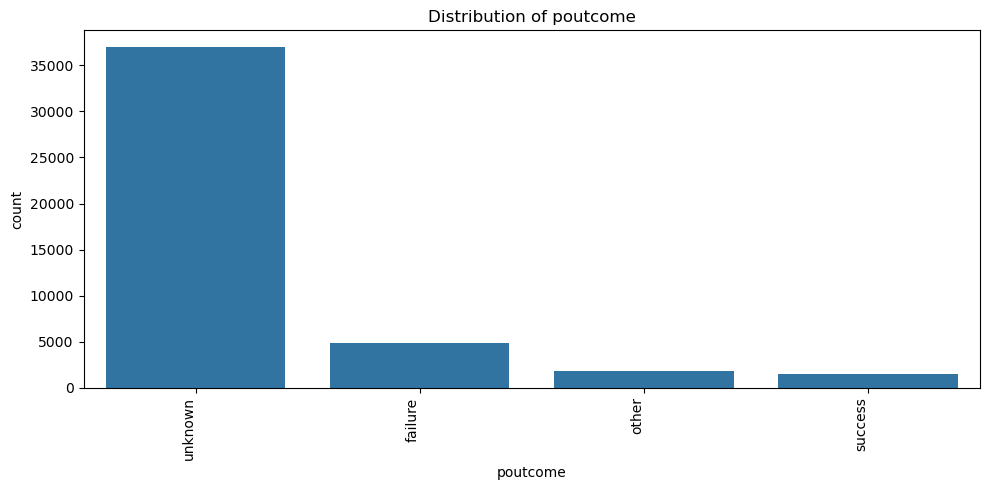

In [18]:
# plot to see distribution of categroical variables
for var in categoric_vars[:-1]:
    plt.figure(figsize=(10,5))
    g = sns.countplot(x=var,data=df)
    g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
    plt.title("Distribution of "+var)
    plt.tight_layout()
    plt.show()

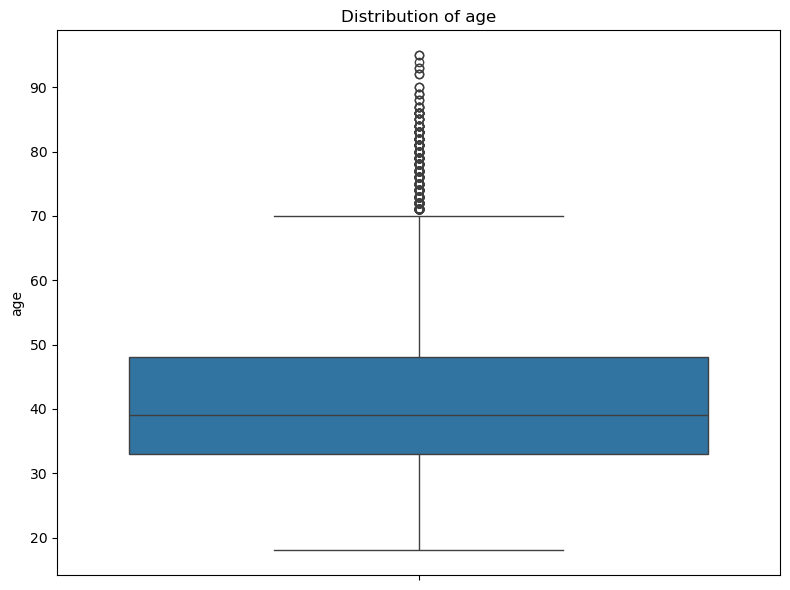

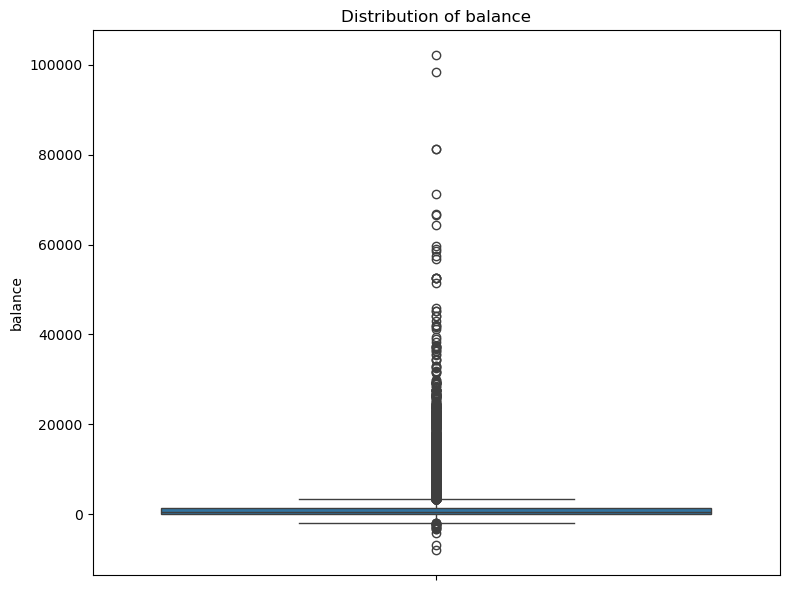

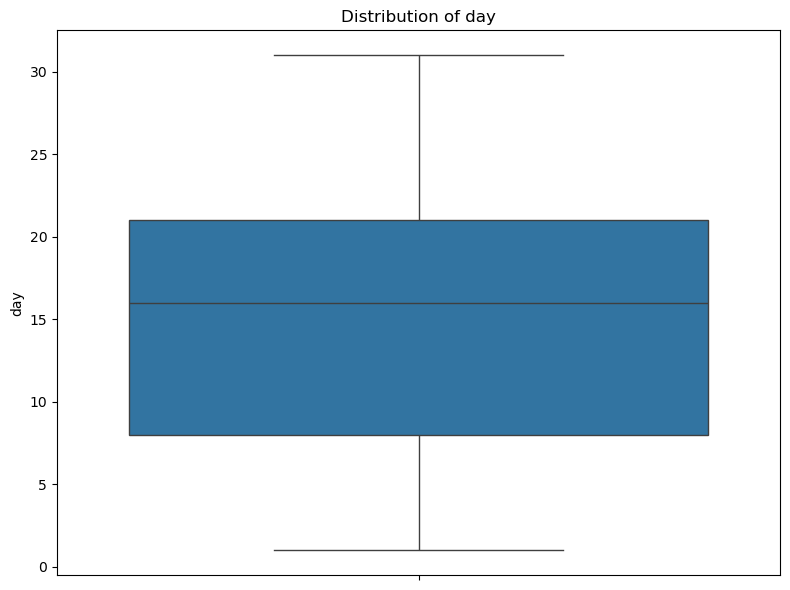

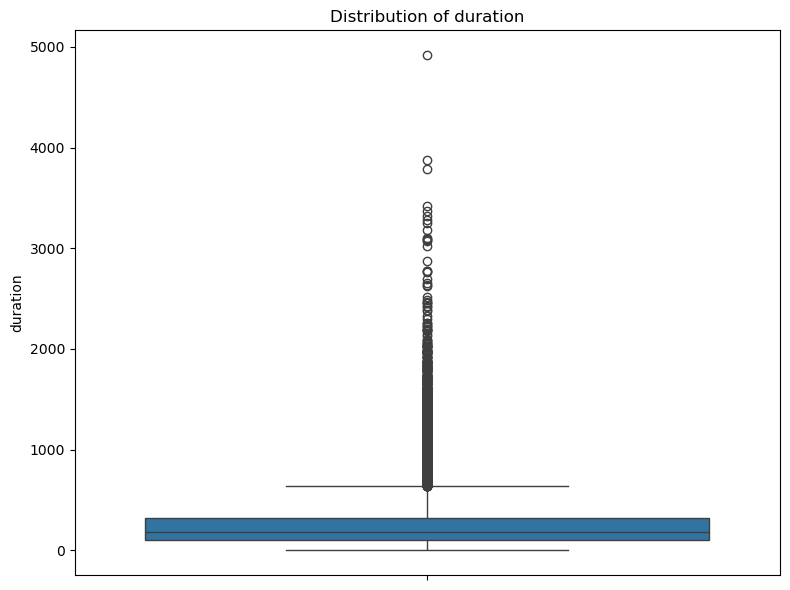

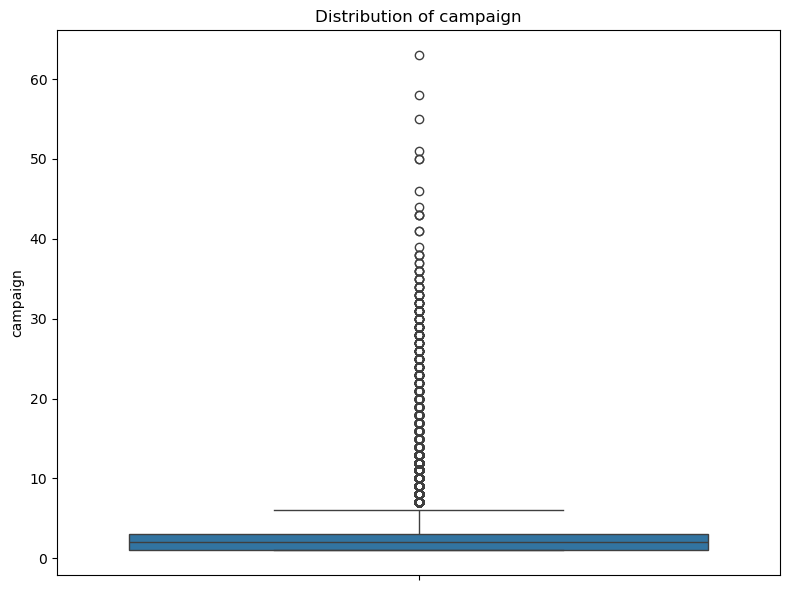

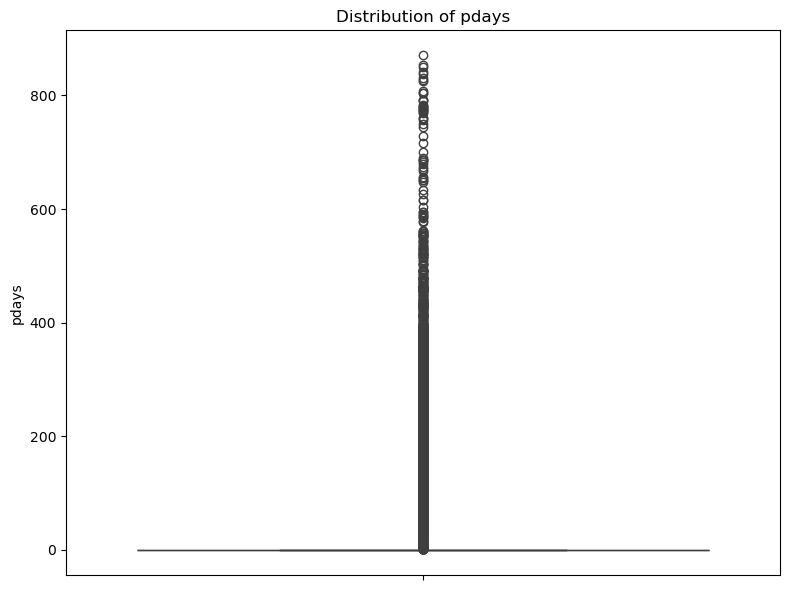

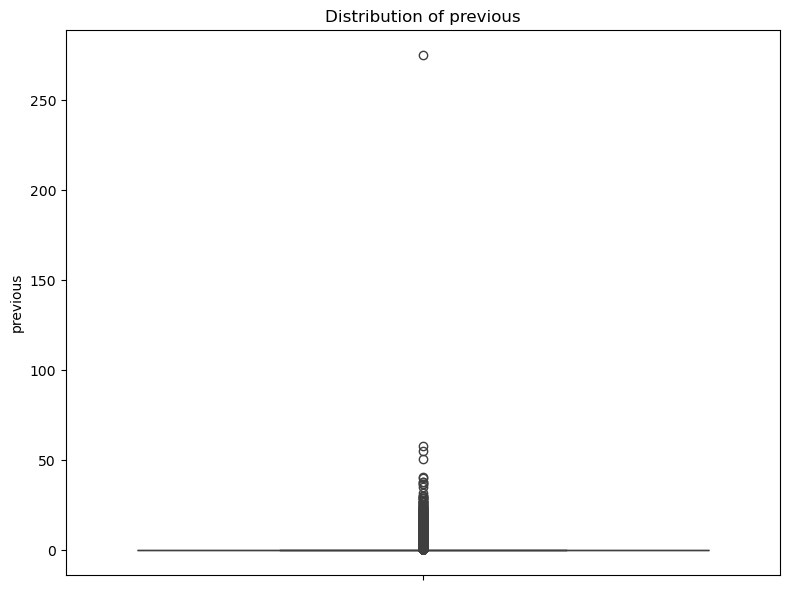

In [19]:
# plot distribution of numerical variables
for var in numeric_vars:
    plt.figure(figsize=(8,6))
    sns.boxplot(df[var])
    plt.title("Distribution of "+var)
    plt.tight_layout()
    plt.show()

As suspected, alot of the numerical features contains outliers, except the day. This outliers will be handled during preprocessing.

> ## Bivariate/Multivariate Exploration

Seeing that most variables aren't evenly distributed, plots and inferences would be made most of the time from the proportion/ratio of the Show variable among the categories of all other variables.

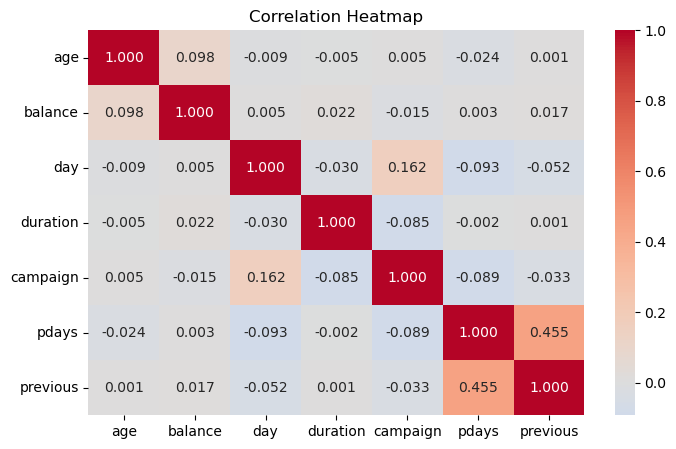

In [22]:
# correlation heatmap for numerical variables
plt.figure(figsize = [8, 5])
sns.heatmap(df[numeric_vars].corr(), annot = True, fmt = '.3f', cmap = 'coolwarm', center = 0)
plt.title('Correlation Heatmap')
plt.show()

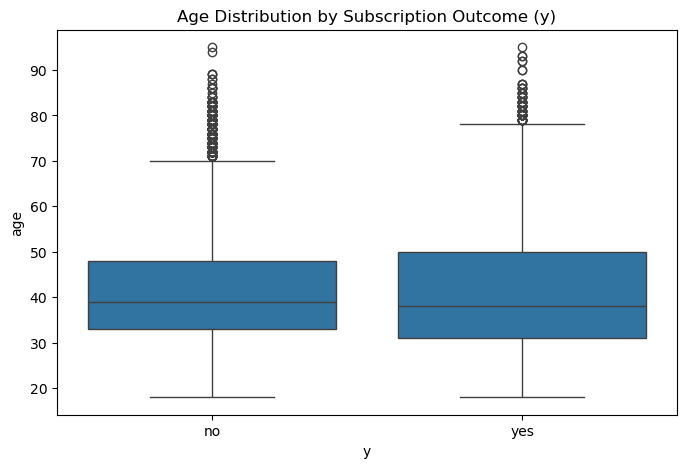

In [23]:
# distribution of age across subscription outcomes
plt.figure(figsize=(8, 5))
sns.boxplot(x='y', y='age', data=df)
plt.title('Age Distribution by Subscription Outcome (y)')
plt.show()

As seen above, the plot suggests that age may not be a strong differentiating factor for predicting whether a client will subscribe to a term deposit. Also, the presence of many outliers indicates that the dataset contains older individuals who may deviate from the general trend, potentially affecting the model.

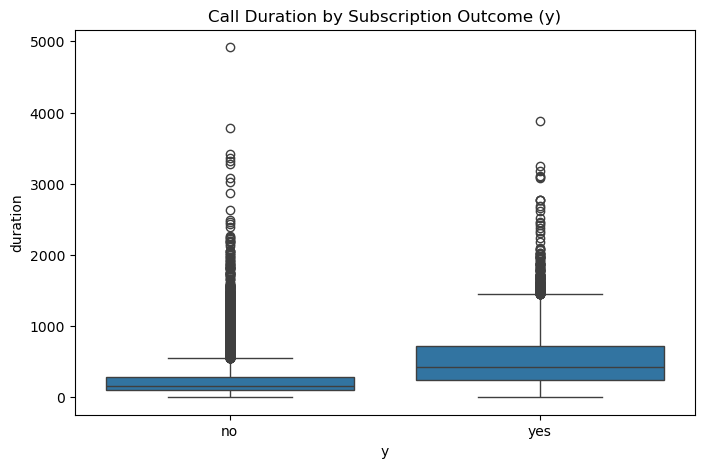

In [25]:
# duration of call distribution based on the subscription outcome
plt.figure(figsize=(8, 5))
sns.boxplot(x='y', y='duration', data=df)
plt.title('Call Duration by Subscription Outcome (y)')
plt.show()

Call duration appears to be an important factor in predicting subscription outcomes, with longer calls being associated with higher success rates.
Outliers on the longer end might indicate situations where very long calls do not always lead to a subscription, which could merit further investigation.

**Now, let's move on to see how the categories of the categorical variables are distributed between the target groups**:

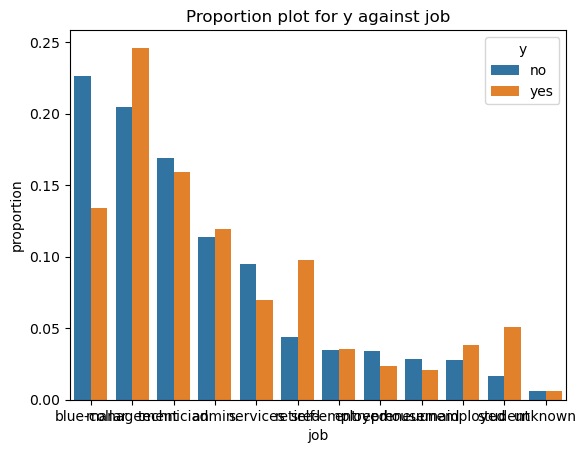

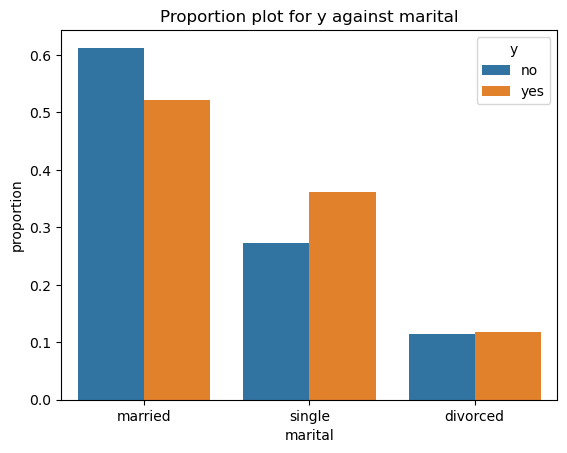

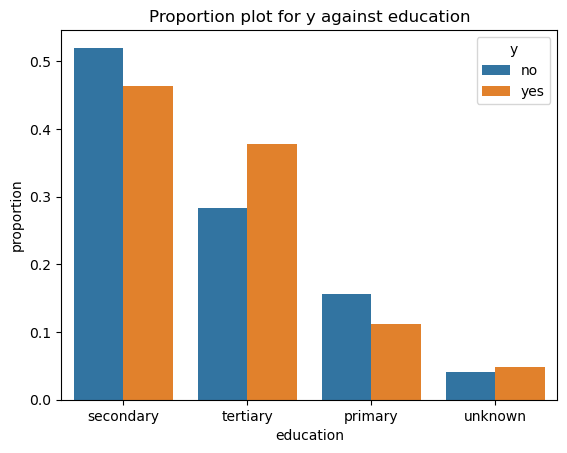

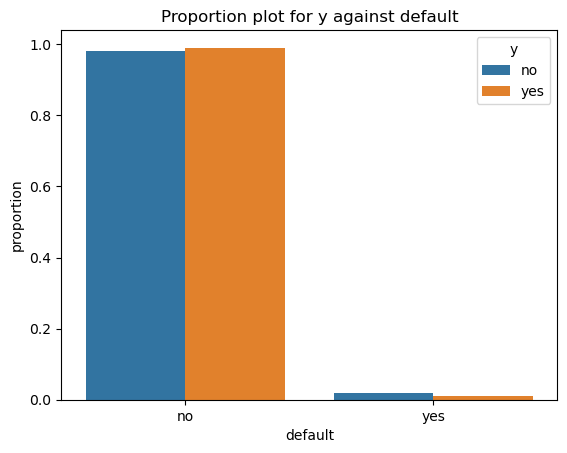

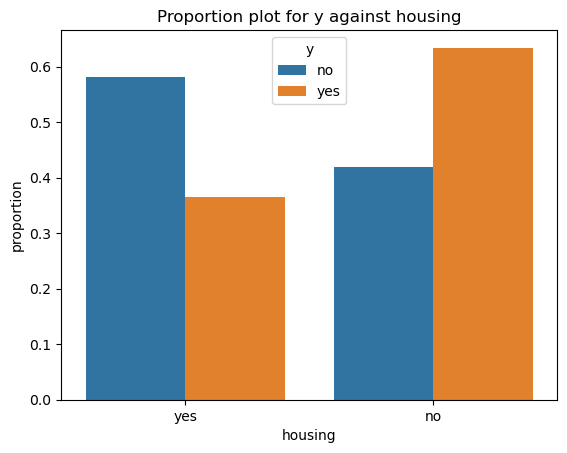

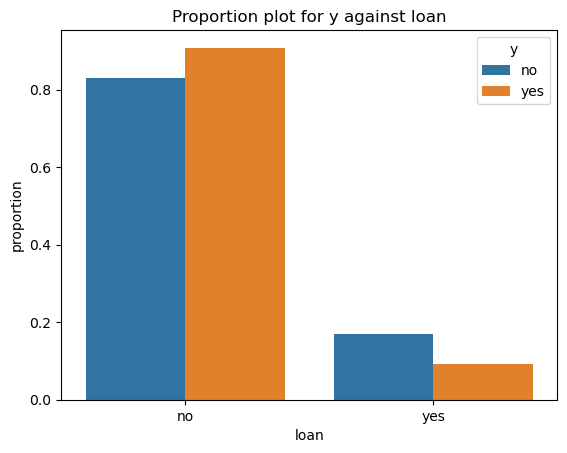

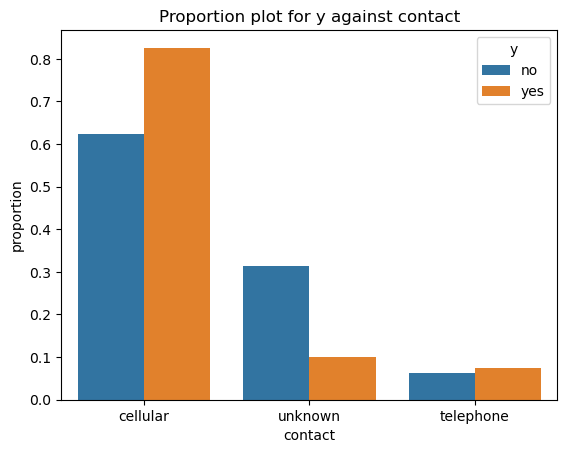

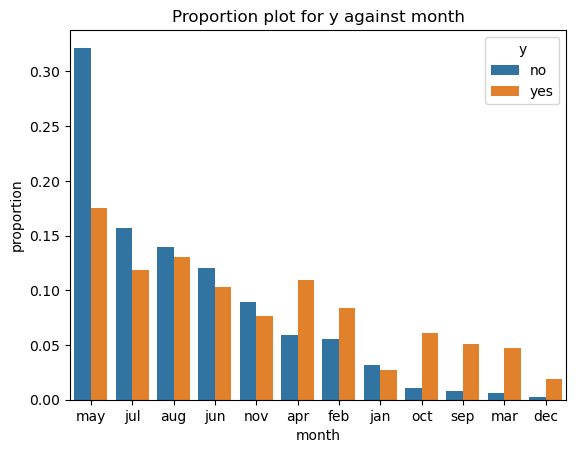

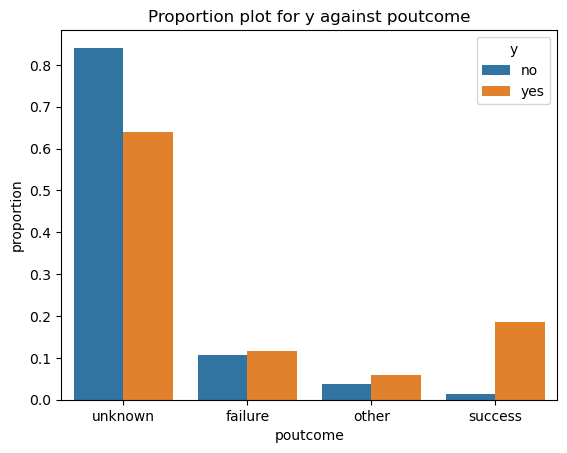

In [28]:
#plot
y, hue = "proportion", "y"
for x in categoric_vars[:-1]:
    (df[x]
     .groupby(df[hue])
     .value_counts(normalize=True)
     .rename(y)
     .reset_index()
     .pipe((sns.barplot, "data"), x=x, y=y, hue=hue))
    plt.title(f"Proportion plot for y against {x}")
    plt.show()

Looking at how there are variations in the groups, most of this categorical variables are showing potential to be a predictor.

We'll stop with exploration here and move on to preprocess the data for modelling:

<a id='dpp'></a>
## Data Preprocessing and Feature Engineering

In this section, several steps will be performed to prepare the dataset for modeling. These steps include handling outliers, encoding categorical variables, standardizing the data, and splitting it into training and test sets. The preprocessing steps are outlined below:

### 1. Handling Outliers
Outliers in numerical variables such as `balance`, `duration`, `campaign`, `pdays`, and `previous` will be detected and treated to minimize their impact on the performance of the model. Specifically, I will consider capping extreme outliers, especially those that fall far outside the interquartile range (

### 2. Dropping Columns with Mostly Zero Values
Some columns, such as `previous`, contain a large number of zero values, which could add noise rather than useful information. This will be dropped to simplify the model and reduce dimensionality.IQR).3
### 2. Encoding Categorical Variables
We have several categorical variables such as `job`, `marital`, `education`, `default`, `housing`, `loan`, `contact`, `month`, and `poutcome`. 
- **Dummy Encoding**: Categorical variables that do not have an inherent order (e.g., `job`, `marital`, `contact`, etc.) will be one-hot encoded to transform them into binary dummy variables.
- **Label Encoding**: For variables that are hierarchical or ordinal in nature (e.g., `education`), we will apply label encoding, where the categories will be assigned integer values representing their rank or or4er.

### 3. Standardization
Since we are working with numerical features that have different scales (e.g., `age`, `balance`, `duration`), standardization will be applied. Standardization will scale the numerical features to have a mean of 0 and a standard deviation of 1. This step is particularly important for algorithms sensitive to feature scaling, such as logistic regression or support vector ma5hines.

### 4. Train-Test Split
Finally, the dataset will be split into a training set and a test set. This step will allow us to train the model on one portion of the data and evaluate its performance on unseen data. We will use an 80-20 split, where 80% of the data is used for training and 20% for testing.

By the end of this section, we will have a fully preprocessed and ready-to-model dataset.
to-model dataset.
ready-to-model dataset.


In [31]:
# make a copy of the data
data = df.copy()

In [32]:
# Handling Outliers
def cap_outliers(df, column):
    """a function to cap outliers based on IQR"""
    # calculate the 25th and 75th percentiles
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    # calculate the interquartile range (IQR)
    IQR = Q3 - Q1
    # calculate the upper and lower limits for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    print(col)
    print("Upper Bound:", upper_bound, "Lower Bound:", lower_bound)
    # apply
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])


# apply the outlier capping function
for col in numeric_vars:
    cap_outliers(data, col)

age
Upper Bound: 70.5 Lower Bound: 10.5
balance
Upper Bound: 3462.0 Lower Bound: -1962.0
day
Upper Bound: 40.5 Lower Bound: -11.5
duration
Upper Bound: 643.0 Lower Bound: -221.0
campaign
Upper Bound: 6.0 Lower Bound: -2.0
pdays
Upper Bound: -1.0 Lower Bound: -1.0
previous
Upper Bound: 0.0 Lower Bound: 0.0


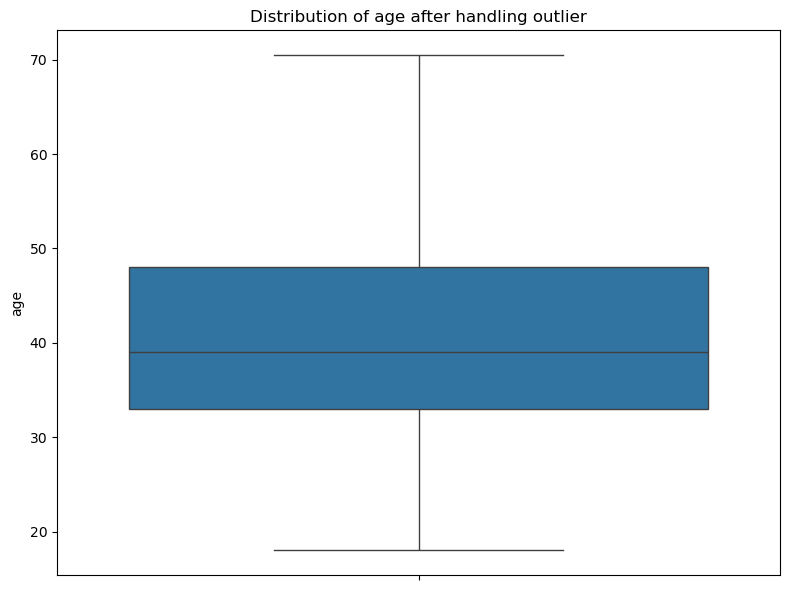

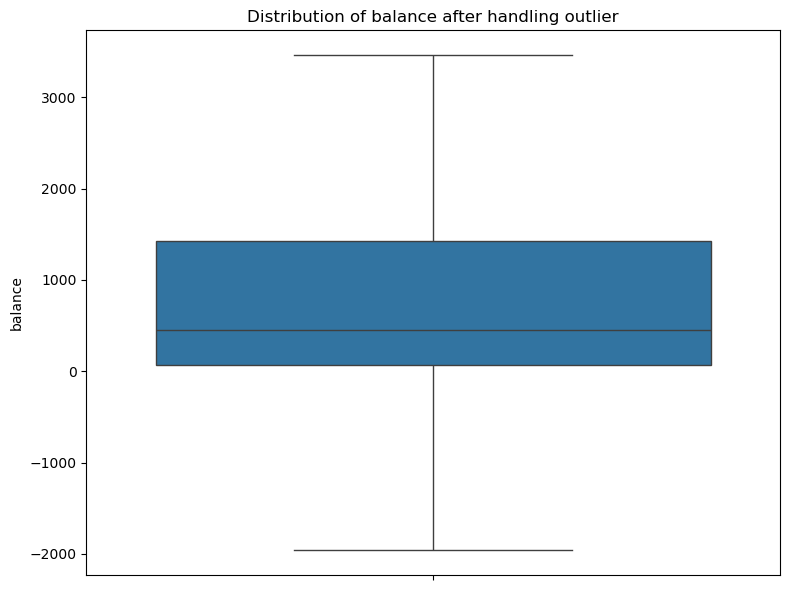

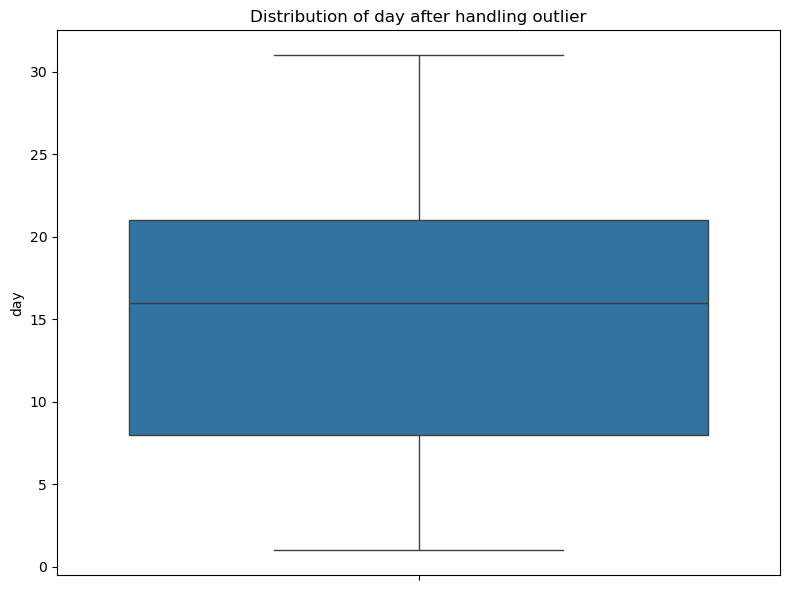

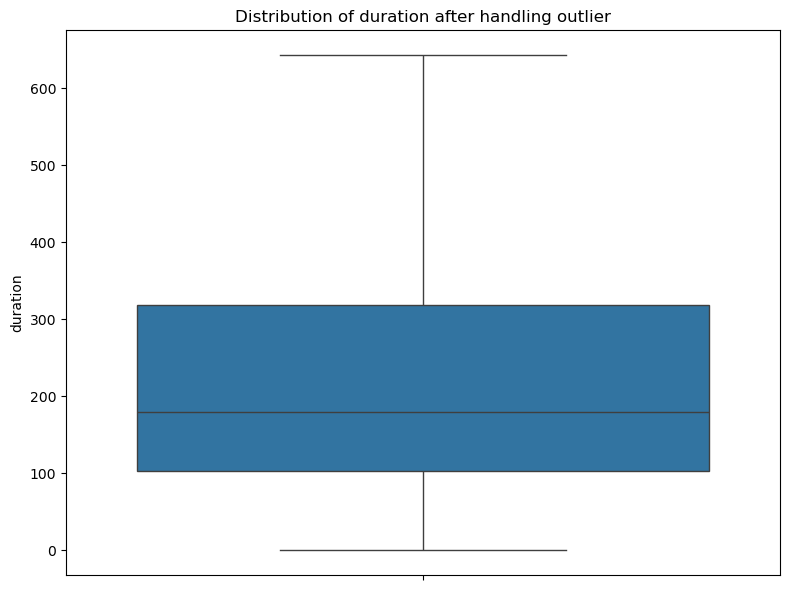

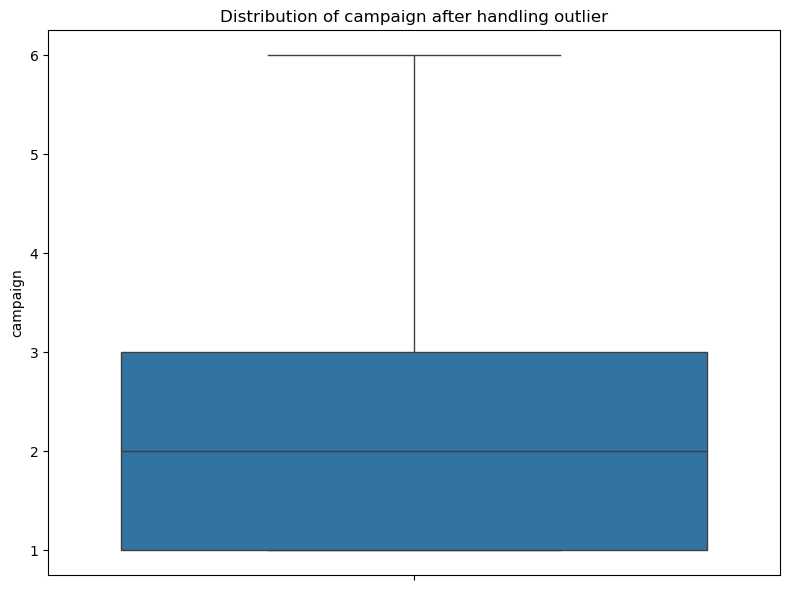

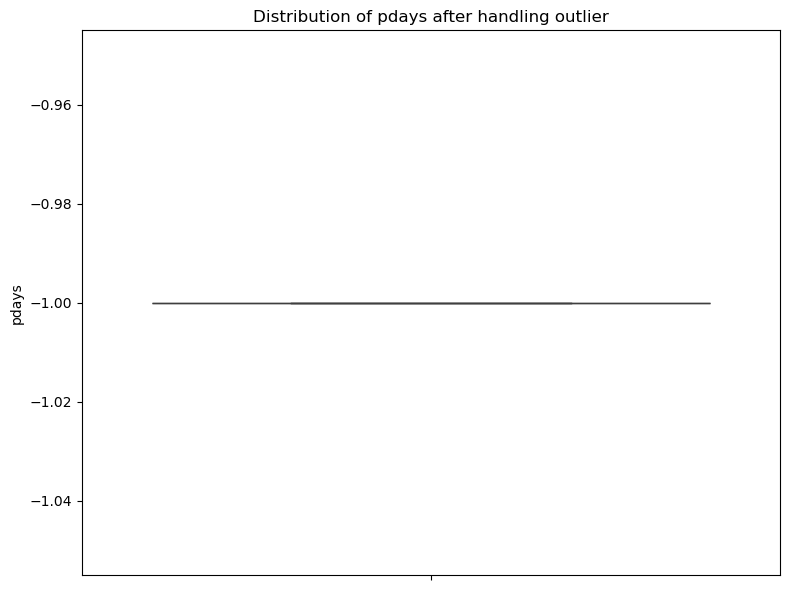

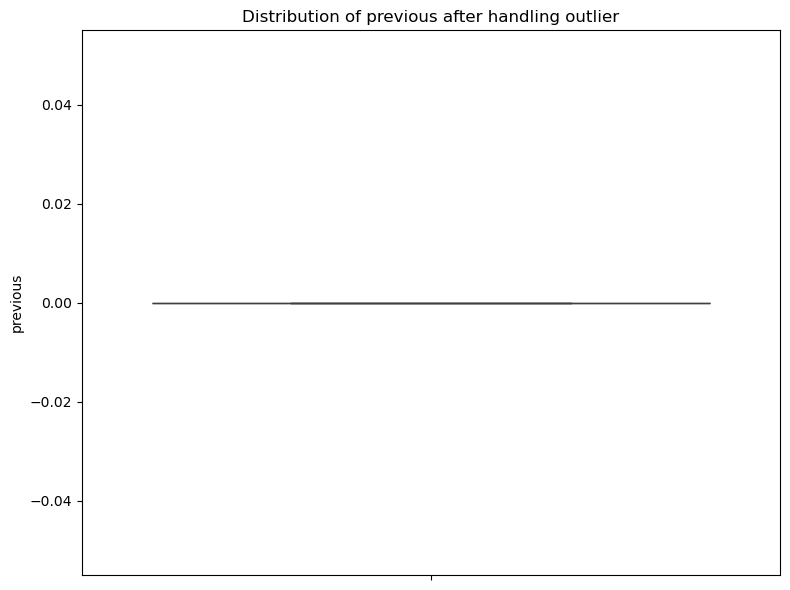

In [33]:
# plot distribution of numerical variables
for var in numeric_vars:
    plt.figure(figsize=(8,6))
    sns.boxplot(data[var])
    plt.title("Distribution of "+var+ " after handling outlier")
    plt.tight_layout()
    plt.show()

In [34]:
# drop the columns with no variation
columns_to_drop = ['previous', 'pdays']
data = data.drop(columns= columns_to_drop)

data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,poutcome,y
0,58.0,management,married,tertiary,no,2143.0,yes,no,unknown,5.0,may,261.0,1.0,unknown,no
1,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5.0,may,151.0,1.0,unknown,no
2,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5.0,may,76.0,1.0,unknown,no
3,47.0,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5.0,may,92.0,1.0,unknown,no
4,33.0,unknown,single,unknown,no,1.0,no,no,unknown,5.0,may,198.0,1.0,unknown,no


In [35]:
# Encoding Categorical Variables

# dummy encoding for non-hierarchical categorical variables
data = pd.get_dummies(data, columns=['job', 'marital', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome'], drop_first=True)

# custom encoding (label encoding) for education since it's a hierarchical categorical variables
education_order = {
    'primary': 1,    # lowest level
    'secondary': 2,  # middle level
    'tertiary': 3,   # highest level
    'unknown': 0     # if education level is unknown
    }
data['education'] = data['education'].map(education_order)

In [36]:
data.head()

,age,education,balance,day,duration,campaign,y,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,58.0,3,2143.0,5.0,261.0,1.0,no,False,False,False,...,False,False,False,True,False,False,False,False,False,True
1,44.0,2,29.0,5.0,151.0,1.0,no,False,False,False,...,False,False,False,True,False,False,False,False,False,True
2,33.0,2,2.0,5.0,76.0,1.0,no,False,True,False,...,False,False,False,True,False,False,False,False,False,True
3,47.0,0,1506.0,5.0,92.0,1.0,no,True,False,False,...,False,False,False,True,False,False,False,False,False,True
4,33.0,0,1.0,5.0,198.0,1.0,no,False,False,False,...,False,False,False,True,False,False,False,False,False,True


In [37]:
# Standardization
from sklearn.preprocessing import StandardScaler
# select numerical columns for standardization
numerical_features = ['age', 'balance', 'day', 'duration', 'campaign']

# Initialize the standard scaler
scaler = StandardScaler()

# Apply standardization to the numerical columns
data[numerical_features] = scaler.fit_transform(data[numerical_features])

In [38]:
data.head()

,age,education,balance,day,duration,campaign,y,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,1.648117,3,1.027653,-1.298476,0.147445,-0.870092,no,False,False,False,...,False,False,False,True,False,False,False,False,False,True
1,0.301287,2,-0.768817,-1.298476,-0.474910,-0.870092,no,False,False,False,...,False,False,False,True,False,False,False,False,False,True
2,-0.756936,2,-0.791761,-1.298476,-0.899243,-0.870092,no,False,True,False,...,False,False,False,True,False,False,False,False,False,True
3,0.589894,0,0.486333,-1.298476,-0.808718,-0.870092,no,True,False,False,...,False,False,False,True,False,False,False,False,False,True
4,-0.756936,0,-0.792611,-1.298476,-0.208994,-0.870092,no,False,False,False,...,False,False,False,True,False,False,False,False,False,True


In [39]:
# Train-Test Split
from sklearn.model_selection import train_test_split
# separate features (X) and the target variable (y)
X = data.drop(columns=['y'])
# convert target variable to binary
y = data['y'].map({'yes': 1, 'no': 0})  

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Display shapes of the resulting datasets
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (36168, 38)
Test set shape: (9043, 38)


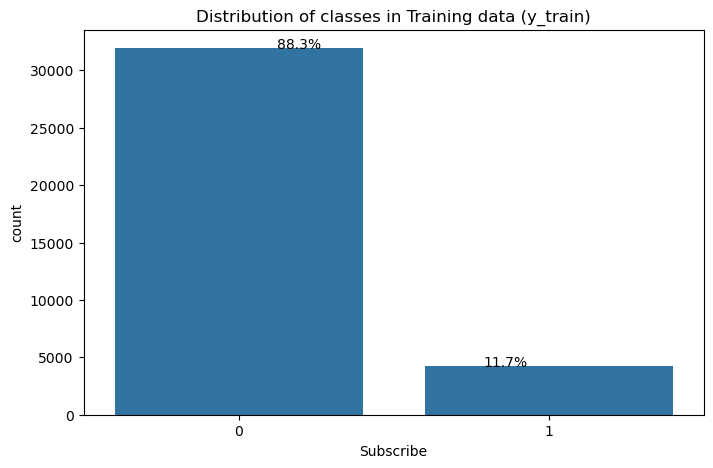

In [40]:
plt.figure(figsize=[8, 5])
base_color = sns.color_palette()[0]
total = float(len(y_train))
ax = sns.countplot(x=y_train, color = base_color)
plt.title('Distribution of classes in Training data (y_train)')
plt.xlabel('Subscribe')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = (p.get_x() + p.get_width())/1.5
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
plt.show()

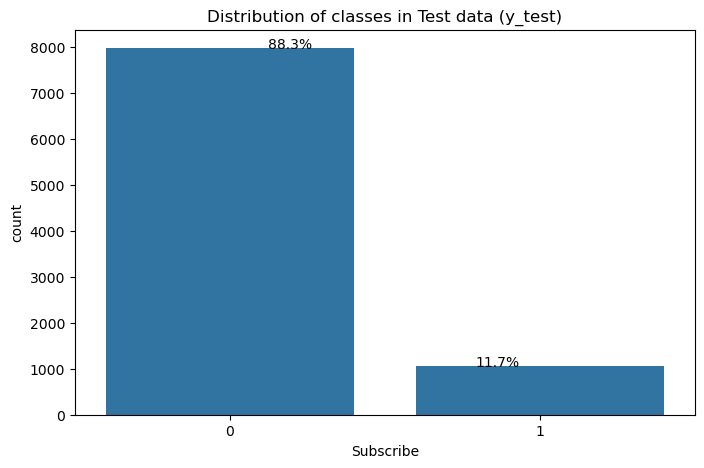

In [41]:
plt.figure(figsize=[8, 5])
base_color = sns.color_palette()[0]
total = float(len(y_test))
ax = sns.countplot(x=y_test, color = base_color)
plt.title('Distribution of classes in Test data (y_test)')
plt.xlabel('Subscribe')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = (p.get_x() + p.get_width())/1.5
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
plt.show()

<a id='modelling'></a>
## Modelling

This project is a typical supervised learning task since we are given labeled training examples. Moreover  it is a typical  binary classification problem as it involves predicting between two classes (yes, no). More specifically, this is a multivariate classification problem since the system will use multiple features to make a prediction.
<br>
**Classification Algorithm**:\
For this task, we will explore various machine learning algorithms, including:
* Logistic Regression 
* Gradient Boosting Classifier

**Performance Measure:** <br>
As implemented under data preprocessing, 80% of the dataset will be used for model training while the remaining 20% will be used as a test set to evaluate the system.
 
 
**Evaluation Metric**\
Since this is an imbalanced classification problem (with only about 11.7% of the records belonging to the "yes" class), accuracy alone is not an appropriate evaluation metric. A model that predicts "no" most of the time could achieve high accuracy, but would fail to correctly identify many clients likely to subscribe.

Given the imbalance in the dataset, we will place greater emphasis on metrics like Precision, Recall, and F1 Score:

- **Recall**: Ensures that we are correctly identifying a good proportion of clients who will subscribe to the term deposit.\
- **Precision**: Focuses on reducing false positives (clients who are unlikely to subscribe)\
- **F1 Score**: Provides a balance between precision and recall, helping to ensure that we do not overly favor one metric at the expense of the other.

In [43]:
# evaluation metrics
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report
def evaluate_on_test_set(actual, prediction, model_name):
    """
    This function returns the evaluation metrics of a model on the test set
    """
    acc_score = accuracy_score(actual, prediction)
    prec = precision_score(actual, prediction)
    rec = recall_score(actual, prediction)
    score_gen = f1_score(actual, prediction)
    class_report = classification_report(actual, prediction, target_names=['no', 'yes'])

    result_dict = {"model_name": model_name,
                   "accuracy_score": acc_score,
                   "f1_score": score_gen,
                   "precision_score": prec,
                   "recall_score": rec}
    
    print("\n==========================Test Scores=====================================")    
    print("accuracy_score: %.3f"%(acc_score))
    print("f1_score: %.3f"%(score_gen))
    print("precision_score: %.3f"%(prec))
    print("recall_score: %.3f"%(rec))
    print("classification report: \n",class_report)

    return result_dict

# to store results from different models
models_results = []

In [44]:
# Logistic regression
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(random_state=42)
# fit the model on the training data
lr_clf.fit(X_train, y_train)

# make predictions on the test data
y_pred_lr = lr_clf.predict(X_test)

# evaluate
models_results.append(evaluate_on_test_set(y_test, y_pred_lr, "LR Model"))


==========================Test Scores=====================================
accuracy_score: 0.901
f1_score: 0.459
precision_score: 0.633
recall_score: 0.360
classification report: 
               precision    recall  f1-score   support

          no       0.92      0.97      0.95      7985
         yes       0.63      0.36      0.46      1058

    accuracy                           0.90      9043
   macro avg       0.78      0.67      0.70      9043
weighted avg       0.89      0.90      0.89      9043



In [45]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier(random_state=42)
# fit the model on the training data
gb_clf.fit(X_train, y_train)

# make predictions on the test data
y_pred_gb = gb_clf.predict(X_test)

# evaluate
models_results.append(evaluate_on_test_set(y_test, y_pred_gb, "GBC Model"))


==========================Test Scores=====================================
accuracy_score: 0.904
f1_score: 0.486
precision_score: 0.645
recall_score: 0.390
classification report: 
               precision    recall  f1-score   support

          no       0.92      0.97      0.95      7985
         yes       0.65      0.39      0.49      1058

    accuracy                           0.90      9043
   macro avg       0.78      0.68      0.72      9043
weighted avg       0.89      0.90      0.89      9043



### models hyperparameter tuning

In [47]:
from sklearn.model_selection import GridSearchCV

In [48]:
# Logistis Regression

logreg = LogisticRegression(max_iter=1000, random_state=42)

# define the parameter grid for hyperparameter tuning
param_grid = {
    'penalty': ['l1', 'l2'],               # regularization term: L1 or L2
    'C': np.logspace(-4, 4, 5),           # regularization strength: inverse of regularization (smaller values -> stronger regularization)
    'solver': ['liblinear', 'newton-cg'],
}

# set up GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5, scoring='f1', verbose=1)

# perform the grid search
grid_search.fit(X_train, y_train)

# best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# best model evaluation
best_model = grid_search.best_estimator_

# make predictions on the test set
y_pred = best_model.predict(X_test)

# evaluation metrics
models_results.append(evaluate_on_test_set(y_test, y_pred, "LR Tuned Model"))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Hyperparameters: {'C': 100.0, 'penalty': 'l2', 'solver': 'liblinear'}

==========================Test Scores=====================================
accuracy_score: 0.901
f1_score: 0.461
precision_score: 0.635
recall_score: 0.362
classification report: 
               precision    recall  f1-score   support

          no       0.92      0.97      0.95      7985
         yes       0.64      0.36      0.46      1058

    accuracy                           0.90      9043
   macro avg       0.78      0.67      0.70      9043
weighted avg       0.89      0.90      0.89      9043



Showed an improved f1-score.

In [50]:
# initialize the Gradient Boosting Classifier
gbc = GradientBoostingClassifier(n_estimators=200, max_features=2, max_depth = 3, random_state=42)

# define the parameter grid for hyperparameter tuning
param_grid = {'learning_rate': [0.001, 0.01, 0.1, 0.2]}
# param_grid = {
#     'n_estimators': [100, 200, 300],           
#     'learning_rate': [0.001, 0.01, 0.1, 0.2], # learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
#     'max_depth': [3, 4, 5],                   
#     'min_samples_split': [2, 5, 10],          
#     'min_samples_leaf': [1, 2, 4],            
#     'subsample': [0.7, 0.8, 1.0]               
# }

# set up GridSearchCV with 5-fold cross-validation and F1 scoring
grid_search_gbc = GridSearchCV(estimator=gbc, param_grid=param_grid, cv=5, scoring='f1', verbose=1)

# perform the grid search
grid_search_gbc.fit(X_train, y_train)

# best hyperparameters
print("Best Hyperparameters for Gradient Boosting:", grid_search_gbc.best_params_)

# best model evaluation
best_gbc_model = grid_search_gbc.best_estimator_

# Make predictions on the test set
y_pred_gbc = best_gbc_model.predict(X_test)

# Evaluation metrics
models_results.append(evaluate_on_test_set(y_test, y_pred_gbc, "GBC Tuned Model"))


Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best Hyperparameters for Gradient Boosting: {'learning_rate': 0.2}

==========================Test Scores=====================================
accuracy_score: 0.901
f1_score: 0.476
precision_score: 0.623
recall_score: 0.386
classification report: 
               precision    recall  f1-score   support

          no       0.92      0.97      0.95      7985
         yes       0.62      0.39      0.48      1058

    accuracy                           0.90      9043
   macro avg       0.77      0.68      0.71      9043
weighted avg       0.89      0.90      0.89      9043



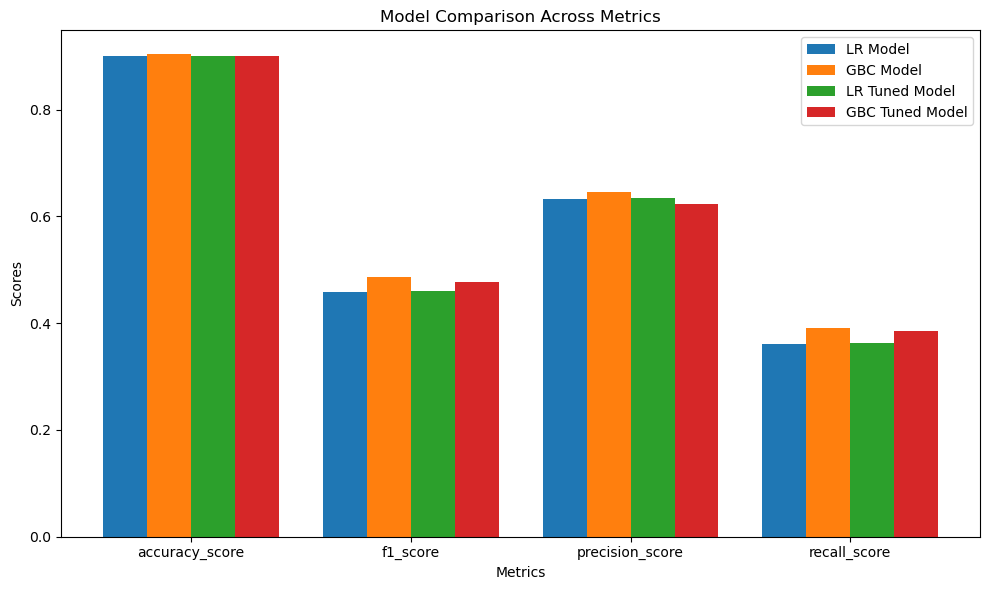

,model_name,accuracy_score,f1_score,precision_score,recall_score
0,LR Model,0.900697,0.459036,0.632890,0.360113
1,GBC Model,0.903572,0.486455,0.645312,0.390359
2,LR Tuned Model,0.901028,0.461168,0.635158,0.362004
3,GBC Tuned Model,0.900807,0.476357,0.622901,0.385633


In [51]:
# Visually compare the model performance
result_df = pd.DataFrame(models_results)
# Metrics to plot
metrics = ["accuracy_score", "f1_score", "precision_score", "recall_score"]

# Set the position of the bars
x = np.arange(len(metrics))  # Label locations
width = 0.2  # Width of the bars

# Create a figure and axes for the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot bars for each model side by side
for i, model in enumerate(result_df['model_name']):
    ax.bar(x + width*i, result_df.loc[i, metrics], width, label=model)

# Add labels, title, and custom x-axis tick labels
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Model Comparison Across Metrics')
ax.set_xticks(x + width*(len(result_df['model_name']) - 1)/2)
ax.set_xticklabels(metrics)
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

result_df

### Models Performance Comparison:**

- **Accuracy**:
  - All models have very similar accuracy scores, with a range between 0.9007 and 0.9036. The highest accuracy is observed for the **GBC Model** (0.9036), but the difference across models is minimal.

- **F1 Score**:
  - The **GBC Model** has the highest F1 score (0.486), indicating that it provides the best balance between precision and recall. This means it performs slightly better in identifying term deposit subscribers while maintaining an acceptable false-positive rate.
  - The **GBC Tuned Model** also performs well in terms of F1 score (0.476), followed by the LR Tuned Model (0.461).

- **Precision**:
  - The **GBC Model** has the highest precision (0.645), meaning that when it predicts a client will subscribe, it is correct more often than the other models.
  - The **GBC Tuned Model** and LR Tuned Model have slightly lower precision, but they are still quite close to each other.

- **Recall**:
  - The **GBC Model** has the highest recall (0.390), which indicates that it identifies more actual subscribers compared to the other models. It strikes a good balance in terms of predicting a higher number of true positives.
  - The **GBC Tuned Model** also performs well in recall (0.385), with the other models slightly lower.

**Best Model Selection**:
Based on the evaluation metrics:
- The **GBC Model** (Gradient Boosting Classifier) consistently performs best across all metrics, including accuracy, F1 score, precision, and recall.
- It has the highest **F1 score**, indicating the best balance between precision and recall, which is crucial in this imbalanced classification problem.
- It also achieves the highest **precision** and **recall**, meaning it not only identifies more true subscribers but also makes fewer false positive predictions when predicting a subscriber.

## Feature importance

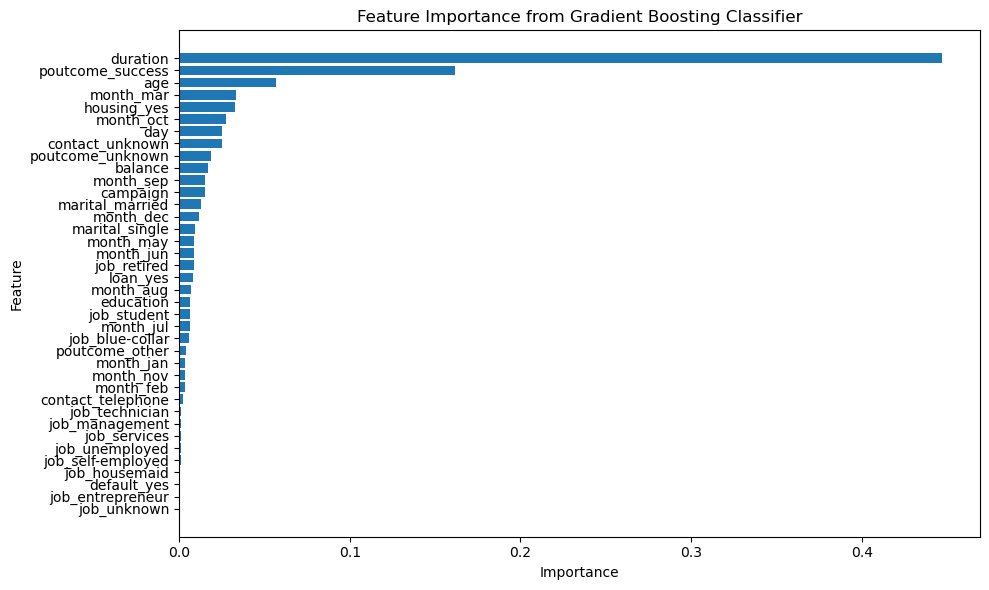

In [54]:
# Extract the feature importance from the best Gradient Boosting model
importances = best_gbc_model.feature_importances_
features = X_train.columns 

# A DataFrame to pair features with their importance scores
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
})

# Sort DataFrame by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Gradient Boosting Classifier')
plt.gca().invert_yaxis()  # To display the highest importance at the top
plt.tight_layout()
plt.show()


The most important factors influencing a client's likelihood to subscribe to a term deposit are call **duration**, **previous campaign success**, and **age**. Clients who engage in longer calls, have successfully subscribed in past campaigns, or are older are more likely to subscribe. Additionally, the month of contact and whether a client has a housing loan also play roles. Marketing strategies should focus on clients with high call engagement, past positive outcomes, and segment campaigns by demographics like age and financial status (e.g., housing loan and balance).

### Conclusion:
This study applied various **predictive modeling** techniques to improve the success of bank marketing campaigns by predicting term deposit subscriptions. The **Gradient Boosting Classifier (GBC)** was identified as the best-performing model, offering the highest **F1 score**, precision, and recall, making it the most effective model for predicting client subscriptions in an imbalanced dataset. This model enables the bank to more accurately target potential subscribers, reducing wasted resources on unlikely prospects.

In terms of identifying the **key factors** influencing client subscriptions, the most significant were **call duration**, **previous campaign success**, **age**, and the **month of contact**. Longer call engagement, previous successful interactions, and certain demographic and timing factors greatly increase the likelihood of a subscription. These insights can be used to optimize marketing strategies by focusing efforts on highly engaged clients, re-targeting past subscribers, and tailoring campaigns by age and seasonality.

Among the machine learning models tested, **Gradient Boosting** proved to be the most accurate and balanced model for this task, outshining Logistic Regression and its tuned versions. It provided the best balance between capturing true positives (recall) and maintaining precision, crucial for campaign cost-efficiency.

Finally, **data mining** has shown its potential to significantly enhance direct marketing strategies. By leveraging predictive analytics and feature importance, banks can fine-tune their outreach to focus on clients most likely to subscribe, thereby improving subscription rates and overall marketing efficiency.